<a href="https://colab.research.google.com/github/carolvieirav/Estatistica_Python/blob/main/Regress%C3%A3o%20Log%C3%ADstica/Avalia%C3%A7%C3%A3o_de_Regress%C3%A3o_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification

In [23]:
X, y = make_classification(n_samples=2000, #linhas
                           n_features=2, #colunas
                           n_informative=2, # número de variáveis explicativas
                           n_redundant=0, # variaveis que não agregam valores novos
                           weights=[0.95, 0.05], #proporção de amostras pra cada classe
                           random_state=42) 

In [24]:
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y, name='target')

X.head()

,feature_1,feature_2
0,0.800062,-0.957489
1,-0.528184,1.238881
2,0.154512,1.217520
3,-1.719618,1.059892
4,-0.735827,-0.245366


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


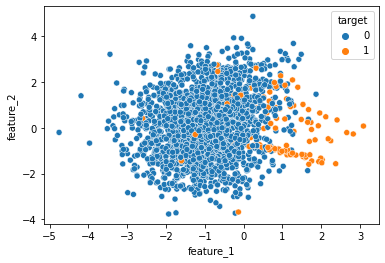

In [25]:
sns.scatterplot(X['feature_1'], X['feature_2'], hue=y,  palette='tab10')

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [28]:
model.coef_

array([[ 2.4144839 , -0.30307802]])

In [29]:
model.score(X, y)

0.9635

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,feature_1,feature_2
968,-1.195228,-0.680139
240,0.692116,1.801912
819,-0.023314,1.200287
692,-1.020177,1.243738
420,-1.233674,0.416807


In [31]:
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
model.score(X_test, y_test)

0.96

In [33]:
y_test.value_counts(normalize=True)

0    0.9325
1    0.0675
Name: target, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


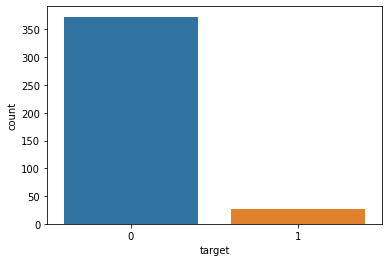

In [34]:
sns.countplot(y_test)

# Matriz de Confusão

In [35]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [36]:
confusion_matrix(y_test, model.predict(X_test))

array([[373,   0],
       [ 16,  11]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


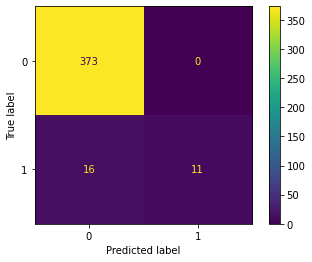

In [37]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


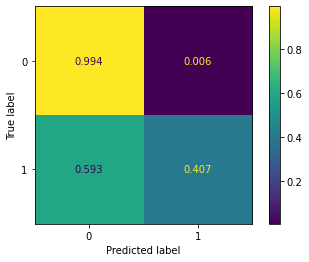

In [38]:
plot_confusion_matrix(model, X, y, values_format='.3f', normalize='true')

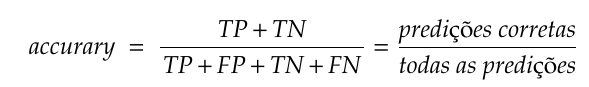

# Precisão - Taxa de acerto

# Recall - Taxa de captura

In [39]:
from sklearn.metrics import precision_score, recall_score

In [40]:
precision_score(y_test, model.predict(X_test))

1.0

In [41]:
recall_score(y_test, model.predict(X_test))

0.4074074074074074

**F1 - Score**

$$F_1 = \frac{1}{\frac{1}{\text{precisão}} + \frac{1}{\text{recall}}}$$

In [42]:
from sklearn.metrics import f1_score

In [44]:
f1_score(y, model.predict(X))

0.5365853658536585

# Threshold

In [45]:
model.predict_proba(X)

array([[6.29339747e-01, 3.70660253e-01],
       [9.88690428e-01, 1.13095718e-02],
       [9.40147187e-01, 5.98528127e-02],
       ...,
       [9.99960413e-01, 3.95869159e-05],
       [9.98746960e-01, 1.25303963e-03],
       [9.86843213e-01, 1.31567870e-02]])

In [46]:
model.predict_proba(X)[:,1] > 0.5

array([3.70660253e-01, 1.13095718e-02, 5.98528127e-02, ...,
       3.95869159e-05, 1.25303963e-03, 1.31567870e-02])

In [52]:
y_pred = model.predict_proba(X)[:,1] > 0.2

In [53]:
precision_score(y, y_pred)

0.5214285714285715

In [54]:
recall_score(y, y_pred)

0.6759259259259259